In [1]:
import MetaTrader5 as mt5
import pandas as pd
import pandas_ta as ta
import time
import numpy as np
from datetime import datetime
from pylab import mpl, plt
import pytz

In [2]:
plt.rcParams['figure.figsize'] = (20,4)
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'

In [3]:
if not mt5.initialize():
    print('initialize() falhou')
    mt5.shutdown()

In [4]:
ativo = 'WDOJ22'

In [5]:
def get_ohlc(ativo, timeframe, n=5):
    ativo = mt5.copy_rates_from_pos(ativo, timeframe, 0, n)
    ativo = pd.DataFrame(ativo)
    ativo['time'] = pd.to_datetime(ativo['time'], unit='s')
    ativo.set_index('time', inplace=True)
    return ativo

In [25]:
df = get_ohlc(ativo, mt5.TIMEFRAME_H1, 500)

In [26]:
df['var'] = df['close'].pct_change()

In [27]:
#df = df[df['real_volume'] > 14000]

In [43]:
df

,open,high,low,close,tick_volume,spread,real_volume,var,movimento,Retorno_simples,maxima,movimento_extremo
time,,,,,,,,,,,,
2021-09-24 15:00:00,5537.5,5537.5,5537.5,5537.5,1,500,5,NaN,None,NaN,0.000000,None
2021-09-27 12:00:00,5555.0,5555.0,5555.0,5555.0,2,500,118,0.003160,subiu,0.003160,0.000000,time 2021-09-24 15:00:00 1.000000 2021-09-2...
2021-09-27 14:00:00,5546.0,5553.0,5545.5,5553.0,3,500,40,-0.000360,caiu,-0.000360,0.001262,time 2021-09-24 15:00:00 1.000000 2021-09-2...
2021-09-27 16:00:00,5579.0,5579.0,5579.0,5579.0,1,500,90,0.004682,subiu,0.004682,0.000000,time 2021-09-24 15:00:00 1.000000 2021-09-2...
2021-09-27 17:00:00,5573.0,5573.0,5559.0,5559.0,3,500,43,-0.003585,caiu,-0.003585,0.000000,time 2021-09-24 15:00:00 1.000000 2021-09-2...
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-08 14:00:00,5122.5,5124.0,5083.0,5092.5,185384,500,591349,-0.005954,caiu,-0.005954,0.000293,time 2021-09-24 15:00:00 1.000000 2021-09-2...
2022-03-08 15:00:00,5092.5,5108.0,5079.5,5100.5,121259,500,394102,0.001571,subiu,0.001571,0.003044,time 2021-09-24 15:00:00 1.000000 2021-09-2...
2022-03-08 16:00:00,5101.0,5108.0,5085.0,5088.5,80565,500,265523,-0.002353,caiu,-0.002353,0.001372,time 2021-09-24 15:00:00 1.000000 2021-09-2...


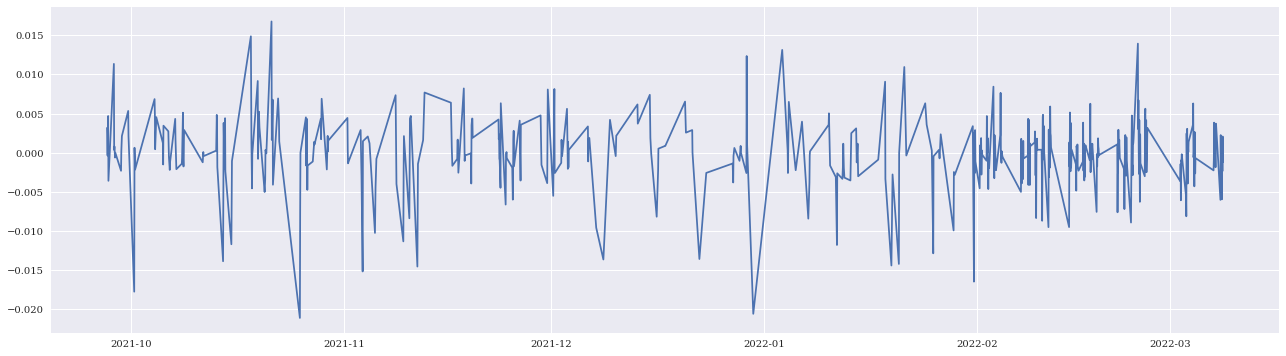

In [44]:
plt.figure(figsize=(22,6))
plt.plot('var', data=df);

#### Cosntrução de colunas para análise de pavios

In [45]:
#stock['direcional'] = stock['variação %'] > 0
def force(num):
    if num > 0:        
        return 'subiu'
    elif num < 0 :
        return 'caiu'
    elif num == 0 :
        return 'zero'

df['movimento'] = df['var'].map(force)

In [46]:
df

,open,high,low,close,tick_volume,spread,real_volume,var,movimento,Retorno_simples,maxima,movimento_extremo
time,,,,,,,,,,,,
2021-09-24 15:00:00,5537.5,5537.5,5537.5,5537.5,1,500,5,NaN,None,NaN,0.000000,None
2021-09-27 12:00:00,5555.0,5555.0,5555.0,5555.0,2,500,118,0.003160,subiu,0.003160,0.000000,time 2021-09-24 15:00:00 1.000000 2021-09-2...
2021-09-27 14:00:00,5546.0,5553.0,5545.5,5553.0,3,500,40,-0.000360,caiu,-0.000360,0.001262,time 2021-09-24 15:00:00 1.000000 2021-09-2...
2021-09-27 16:00:00,5579.0,5579.0,5579.0,5579.0,1,500,90,0.004682,subiu,0.004682,0.000000,time 2021-09-24 15:00:00 1.000000 2021-09-2...
2021-09-27 17:00:00,5573.0,5573.0,5559.0,5559.0,3,500,43,-0.003585,caiu,-0.003585,0.000000,time 2021-09-24 15:00:00 1.000000 2021-09-2...
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-08 14:00:00,5122.5,5124.0,5083.0,5092.5,185384,500,591349,-0.005954,caiu,-0.005954,0.000293,time 2021-09-24 15:00:00 1.000000 2021-09-2...
2022-03-08 15:00:00,5092.5,5108.0,5079.5,5100.5,121259,500,394102,0.001571,subiu,0.001571,0.003044,time 2021-09-24 15:00:00 1.000000 2021-09-2...
2022-03-08 16:00:00,5101.0,5108.0,5085.0,5088.5,80565,500,265523,-0.002353,caiu,-0.002353,0.001372,time 2021-09-24 15:00:00 1.000000 2021-09-2...


In [47]:
df.movimento.value_counts()

caiu     249
subiu    237
zero      13
Name: movimento, dtype: int64

In [48]:
df_positivo = df[df['movimento'] == 'subiu']

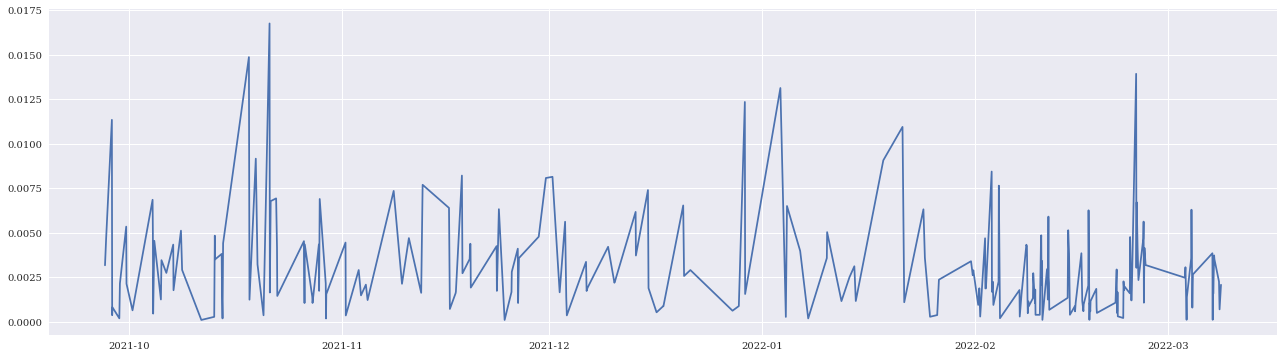

In [49]:
plt.figure(figsize=(22,6))
plt.plot('var', data=df_positivo);

In [50]:
df['Retorno_simples'] = (df['close'] / df['close'].shift(1)) - 1

In [51]:
df['maxima'] = (df['high'] / df['open']) - 1

In [52]:
df

,open,high,low,close,tick_volume,spread,real_volume,var,movimento,Retorno_simples,maxima,movimento_extremo
time,,,,,,,,,,,,
2021-09-24 15:00:00,5537.5,5537.5,5537.5,5537.5,1,500,5,NaN,None,NaN,0.000000,None
2021-09-27 12:00:00,5555.0,5555.0,5555.0,5555.0,2,500,118,0.003160,subiu,0.003160,0.000000,time 2021-09-24 15:00:00 1.000000 2021-09-2...
2021-09-27 14:00:00,5546.0,5553.0,5545.5,5553.0,3,500,40,-0.000360,caiu,-0.000360,0.001262,time 2021-09-24 15:00:00 1.000000 2021-09-2...
2021-09-27 16:00:00,5579.0,5579.0,5579.0,5579.0,1,500,90,0.004682,subiu,0.004682,0.000000,time 2021-09-24 15:00:00 1.000000 2021-09-2...
2021-09-27 17:00:00,5573.0,5573.0,5559.0,5559.0,3,500,43,-0.003585,caiu,-0.003585,0.000000,time 2021-09-24 15:00:00 1.000000 2021-09-2...
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-08 14:00:00,5122.5,5124.0,5083.0,5092.5,185384,500,591349,-0.005954,caiu,-0.005954,0.000293,time 2021-09-24 15:00:00 1.000000 2021-09-2...
2022-03-08 15:00:00,5092.5,5108.0,5079.5,5100.5,121259,500,394102,0.001571,subiu,0.001571,0.003044,time 2021-09-24 15:00:00 1.000000 2021-09-2...
2022-03-08 16:00:00,5101.0,5108.0,5085.0,5088.5,80565,500,265523,-0.002353,caiu,-0.002353,0.001372,time 2021-09-24 15:00:00 1.000000 2021-09-2...


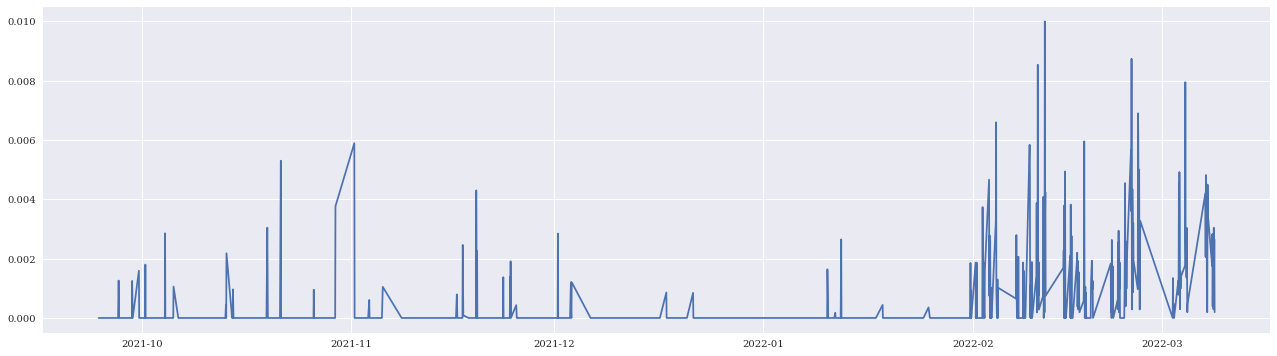

In [53]:
plt.figure(figsize=(22,6))
plt.plot('maxima', data=df);

In [54]:
df

,open,high,low,close,tick_volume,spread,real_volume,var,movimento,Retorno_simples,maxima,movimento_extremo
time,,,,,,,,,,,,
2021-09-24 15:00:00,5537.5,5537.5,5537.5,5537.5,1,500,5,NaN,None,NaN,0.000000,None
2021-09-27 12:00:00,5555.0,5555.0,5555.0,5555.0,2,500,118,0.003160,subiu,0.003160,0.000000,time 2021-09-24 15:00:00 1.000000 2021-09-2...
2021-09-27 14:00:00,5546.0,5553.0,5545.5,5553.0,3,500,40,-0.000360,caiu,-0.000360,0.001262,time 2021-09-24 15:00:00 1.000000 2021-09-2...
2021-09-27 16:00:00,5579.0,5579.0,5579.0,5579.0,1,500,90,0.004682,subiu,0.004682,0.000000,time 2021-09-24 15:00:00 1.000000 2021-09-2...
2021-09-27 17:00:00,5573.0,5573.0,5559.0,5559.0,3,500,43,-0.003585,caiu,-0.003585,0.000000,time 2021-09-24 15:00:00 1.000000 2021-09-2...
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-08 14:00:00,5122.5,5124.0,5083.0,5092.5,185384,500,591349,-0.005954,caiu,-0.005954,0.000293,time 2021-09-24 15:00:00 1.000000 2021-09-2...
2022-03-08 15:00:00,5092.5,5108.0,5079.5,5100.5,121259,500,394102,0.001571,subiu,0.001571,0.003044,time 2021-09-24 15:00:00 1.000000 2021-09-2...
2022-03-08 16:00:00,5101.0,5108.0,5085.0,5088.5,80565,500,265523,-0.002353,caiu,-0.002353,0.001372,time 2021-09-24 15:00:00 1.000000 2021-09-2...


In [55]:
def extreme(n):
    if n == 'subiu': 
        x = df['high'] / df['open']       
        return x
    elif n == 'caiu':
        y = df['low'] / df['open']
        return y
    elif n == 'zero' :
        return 0

df['movimento_extremo'] = df['movimento'].map(extreme)

In [56]:
df

,open,high,low,close,tick_volume,spread,real_volume,var,movimento,Retorno_simples,maxima,movimento_extremo
time,,,,,,,,,,,,
2021-09-24 15:00:00,5537.5,5537.5,5537.5,5537.5,1,500,5,NaN,None,NaN,0.000000,None
2021-09-27 12:00:00,5555.0,5555.0,5555.0,5555.0,2,500,118,0.003160,subiu,0.003160,0.000000,time 2021-09-24 15:00:00 1.000000 2021-09-2...
2021-09-27 14:00:00,5546.0,5553.0,5545.5,5553.0,3,500,40,-0.000360,caiu,-0.000360,0.001262,time 2021-09-24 15:00:00 1.000000 2021-09-2...
2021-09-27 16:00:00,5579.0,5579.0,5579.0,5579.0,1,500,90,0.004682,subiu,0.004682,0.000000,time 2021-09-24 15:00:00 1.000000 2021-09-2...
2021-09-27 17:00:00,5573.0,5573.0,5559.0,5559.0,3,500,43,-0.003585,caiu,-0.003585,0.000000,time 2021-09-24 15:00:00 1.000000 2021-09-2...
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-08 14:00:00,5122.5,5124.0,5083.0,5092.5,185384,500,591349,-0.005954,caiu,-0.005954,0.000293,time 2021-09-24 15:00:00 1.000000 2021-09-2...
2022-03-08 15:00:00,5092.5,5108.0,5079.5,5100.5,121259,500,394102,0.001571,subiu,0.001571,0.003044,time 2021-09-24 15:00:00 1.000000 2021-09-2...
2022-03-08 16:00:00,5101.0,5108.0,5085.0,5088.5,80565,500,265523,-0.002353,caiu,-0.002353,0.001372,time 2021-09-24 15:00:00 1.000000 2021-09-2...
